In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def euclidean_distances(X, X_row):
    X_ = (X - X_row) ** 2
    return np.sum(X_, axis=1) ** 0.5

In [3]:
X = np.array([[ 2.7810836 ,  2.550537  ],
       [ 1.46548937,  2.36212508],  
       [ 3.39656169,  4.40029353],  
       [ 1.38807019,  1.85022032],  
       [ 3.06407232,  3.00530597],  
       [ 7.62753121,  2.75926224],
       [ 5.33244125,  2.08862677],
       [ 6.92259672,  1.77106367],
       [ 8.67541865, -0.24206865],
       [ 7.67375647,  3.50856301]])

In [4]:
y = np.array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1])

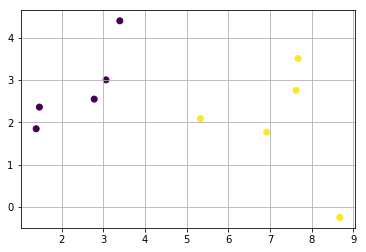

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()

In [6]:
# Locate the most similar neighbors
def get_neighbors(X_train, test_row, k):
    distances = euclidean_distances(X_train, test_row)
    idx_sort = np.argsort(distances)
    return idx_sort[1:k+1]

In [7]:
get_neighbors(X, X[0], 3)

array([4, 1, 3])

In [8]:
def predict_classification(X, y, test_row, k):
    idx_sort = get_neighbors(X, test_row, k)
    output_values = y[idx_sort]
    counts = np.unique(output_values, return_counts=True)
    idx_max = np.argmax(counts[1])
    prediction = counts[0][idx_max]
    print('idx_sort:{}, output_values:{}, prediction:{}'.format(idx_sort, output_values, prediction))
    return prediction

In [9]:
def predict_regression(X, y, test_row, k):
    idx_sort = get_neighbors(X, test_row, k)
    output_values = y[idx_sort]
    prediction = np.sum(output_values) / output_values.shape[0]
    print('idx_sort:{}, output_values:{}, prediction:{}'.format(idx_sort, output_values, prediction))
    return prediction

In [10]:
predict_classification(X, y, np.array([[4.0, 2.5]]), 3)

idx_sort:[0 6 2], output_values:[0 1 0], prediction:0


0

In [11]:
predict_regression(X, y, np.array([[4.0, 2.5]]), 3)

idx_sort:[0 6 2], output_values:[0 1 0], prediction:0.3333333333333333


0.33333333333333331

In [12]:
predict_classification(X, y, X[6], 5)

idx_sort:[7 5 4 0 9], output_values:[1 1 0 0 1], prediction:1


1

In [13]:
predict_regression(X, y, X[6], 5)

idx_sort:[7 5 4 0 9], output_values:[1 1 0 0 1], prediction:0.6


0.59999999999999998